# <font color = red> Tarea
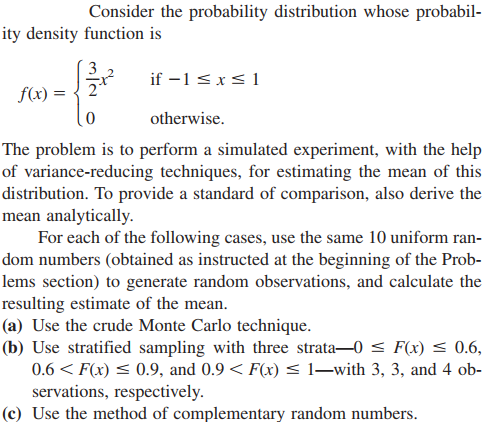
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

$I = \frac{x^3}{2}\big|^{1}_{-1} =1$

In [1]:
import numpy as np
from numpy import random as r
from functools import reduce

$c = \int_{-1}^1 f(x)dx = 1 \rightarrow \frac{F(x) +c_1}{c} = F(x)+c_1$

Para el inciso b) no tiene mucho sentido utilizar $F(x)$ ya que el objetivo de estos métodos es encontrar $I = F(x) \big |_a^b$ con métodos numéricos, no obstante, anteriormente hemos trabajando dividiendo el dominio $x$ en estratos, el ejercicio b pide dividir sobre el contradominio $F(x)$, lo cual por lo menos se necesitan vagas estimaciones de $F(x)$. En la variable \\$s2 se encuentran los valores de $F$ que satisfacen $\textbf s2 =F(x|x=\textbf s)$ para el inciso b. Dada lo observación anterior se tomaran las ponderaciones sobre $x$ estandarizada y no sobre $F(x)$.

In [2]:
f = lambda x: 3/2*x**2
c1 = .5 #constante de integración
F = lambda x: np.float_power(x,3)/2 + c1
F_1 = lambda x:np.cbrt(2*(x-c1))
c = 1 #
N = 10000
a=-1;b=1

In [3]:
s = np.array([0,.6,.9,1],dtype='float64')
s2 = list(map(F_1,s))
n = np.array([N*30//100,N*30//100,N*40//100])

In [4]:
print("x",s2)
print("F(x)",list(map(F,s2)))

x [-1.0, 0.5848035476425731, 0.9283177667225557, 1.0]
F(x) [0.0, 0.6, 0.8999999999999999, 1.0]


a) montecarlo simple

In [5]:
print('Crude ',np.mean(list(map(lambda x:(b-a)*f(x),np.random.uniform(a,b,N)))))

Crude  0.9991677269395705


b) muestreo estratificado

Con el método de muestreo estratificado podemos estimar la integral definida de manera estocástica. Note que $f$ no es monótona.

In [6]:
def stratIntA(F,n:'iteraciones por estrato',s:'bins',rango:'i.e [-1,1]'):    
    '''Sacamos las diferencias de los estratos para conocer sus ponderaciones '''    
    strata = np.diff(s)    
    diff = np.diff(rango)
    '''Definimos el peso $P_{jk}$ para cada simulación j en el estrato k y los empaquetamos con los estratos '''
    p=zip(s,strata)
    '''Transformamos los aleatorios para generar aleatorios en el intervalo del estrato.
        Evaluamos aleatoriamente la función, lo multiplicamos por su volumen, sumamos y ponderamos.
    '''
    p=zip(s[:-1],strata)
    alt = lambda x,y:(F(diff*(y[0]+ y[1]*r.rand(x)) + rango[0])).sum()*y[1]/x
    a = map(alt,n,p)
    '''Para finalizar sumamos el promedio ponderado de los estratos.'''
    
    return reduce(lambda x,y:x+y,a) * (diff[0])

In [7]:
stratIntA(f,n,s,[a,b])

1.0052076992874455

In [8]:
def stratIntB(F,n:'iteraciones totales',rango:'i.e [-1,1]'):        
    diff = np.diff(rango)
    '''Definioms pesos constantes igual a n para todos los estratos'''
    p= range(n)
    '''Transformamos los aleatorios para generar aleatorios en el intervalo del estrato.
        Evaluamos aleatoriamente la función, lo multiplicamos por su volumen, sumamos y ponderamos.
    '''
    alt = lambda y:(F(diff*((y+ r.rand(1))/n) + rango[0]))/n
    a = map(alt,p)
    '''Para finalizar sumamos el promedio ponderado de los estratos.'''    
    return reduce(lambda x,y:x+y,a) * (diff[0])

In [9]:
stratIntB(f,N,[a,b])[0]

1.000002717014079

c) Aleatorios complementarios

In [10]:
def IntC(f,n,a,b):
    '''Cada aleatorio se evalua dos veces con su complemento, pero solo se generan la mitad de los aleatorios'''
    g=map(lambda x: f(x)+f(b-x+a),r.uniform(a,b,n//2))    
    return (b-a)*np.mean(list(g))/2

In [11]:
IntC(f,N,a,b)

1.0356396952896008

In [12]:
import pandas as pd
ix = [2,4,6,10]
res_anal = 1
frame = pd.DataFrame(index=ix)
frame.index.name='términos'
simple = list(map(lambda c:np.mean(list(map(lambda x:(b-a)*f(x),np.random.uniform(a,b,c)))),ix))
split = lambda x : np.array([x*30//100,x*30//100,x*40//100])
# estrat = list(map(lambda c:stratIntA(f,split(c),s,[a,b]),ix))

estratb = list(map(lambda c:stratIntB(f,c,[a,b])[0],ix))
comp = list(map(lambda c:IntC(f,c,a,b),ix))
frame.loc[ix,'Simple'] = simple
frame.loc[ix,'Error S'] = np.abs((np.array(simple)/res_anal)-1)
frame.loc[ix,'EstratificadoB'] = estratb
frame.loc[ix,'Error EB'] = np.abs((np.array(estratb)/res_anal)-1)
# frame.loc[ix,'Estratificado'] = estrat
# frame.loc[ix,'Error E'] = np.abs((np.array(estrat)/res_anal)-1)
frame.loc[ix,'Aleatorios Complementarios'] = comp
frame.loc[ix,'Error AC'] = np.abs((np.array(comp)/res_anal)-1)
frame

Simple   Error S  EstratificadoB  Error EB  \
términos                                                 
2         2.034353  1.034353        1.320162  0.320162   
4         0.865659  0.134341        1.543999  0.543999   
6         0.537452  0.462548        1.169351  0.169351   
10        0.919201  0.080799        0.981528  0.018472   

          Aleatorios Complementarios  Error AC  
términos                                        
2                           0.163381  0.836619  
4                           0.200531  0.799469  
6                           1.508784  0.508784  
10                          0.723881  0.276119

El método más consistente y con mayor precisión es el estratificado con B pasos. Este metodo es muy parecido a las sumatorias de riemann cuando cada estrato tiene exactamente un paso, la diferencia es que estas evualuando en un punto aleatorioa en vez de por ejemplo, izquierda o derecha. El método estratificado con estratos fijos no se incluye en la tabla por tener tan pocos elementos en la simulación que el redondeo hacía bajo presenta diferencia significativas en los términos utilizados.